# Techniques for model evaluation

## Loading customer delinquency data

In [1]:
import pandas as pd

df = pd.read_csv('./data/Delinquent_customer-Insurance_Premium.csv')

# Remove unrelated data

df = df.drop(columns=["APPLICATION_SUBMISSION_TYPE", 
                      "POSTAL_ADDRESS_TYPE", 
                      "RESIDENTIAL_PHONE", 
                      "EMAIL", 
                      "PROFESSIONAL_PHONE",
                      "MONTHS_IN_RESIDENCE",
                      "OTHER_INCOMES",
                      "PERSONAL_ASSETS_VALUE",
                      "QUANT_CARS",
                      "MONTHS_IN_THE_JOB",
                      "QUANT_ADDITIONAL_CARDS"])

# Converting categorical data to numeric
df['MARITAL_STATUS'] = pd.Categorical(df['MARITAL_STATUS']).codes
df['GENDER'] = pd.Categorical(df['GENDER']).codes

# Fill all missing data
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])
df['RESIDENCE_TYPE'] = df['RESIDENCE_TYPE'].fillna(df['RESIDENCE_TYPE'].mode()[0])
df['PROFESSION_CODE'] = df['PROFESSION_CODE'].fillna(df['PROFESSION_CODE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

display(df)

,GENDER,MARITAL_STATUS,RESIDENCE_TYPE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,QUANT_DEPENDANTS,PERSONAL_MONTHLY_INCOME,QUANT_BANKING_ACCOUNTS,AGE,TARGET_LABEL
0,0,6,1.0,9.0,4.0,1,1,900.00,0,32,1
1,0,2,1.0,11.0,4.0,1,0,750.00,0,34,1
2,0,2,1.0,11.0,2.0,1,0,500.00,0,27,0
3,0,2,1.0,9.0,2.0,1,0,500.00,0,61,0
4,1,2,1.0,9.0,5.0,1,0,1200.00,0,48,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,1.0,9.0,4.0,1,2,1451.00,1,36,1
49996,0,1,1.0,9.0,2.0,2,0,450.00,0,21,0
49997,1,2,2.0,9.0,2.0,1,3,1555.00,0,41,0
49998,0,1,1.0,9.0,2.0,1,1,1443.27,0,28,1


## Readying data frame for machine learning

In [2]:
from sklearn.model_selection import train_test_split

y = df['TARGET_LABEL'].to_numpy()

df=df.drop(columns=['TARGET_LABEL'])

X = df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.33,
                                                   random_state=42)

## Building a decision classifier

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()

print("Training Gaussian NaiveBaye's classifier...")
gnb.fit(X_train, y_train)

Training Gaussian NaiveBaye's classifier...


GaussianNB()

## Model evaluation

In [4]:
# Simple form of model evaluation

print("Predicting with test data...")
y_pred = gnb.predict(X_test)

print("Evaluating the prediction...")

# precision, recall, f1-score and support for the scores
print(classification_report(y_test, y_pred))

Predicting with test data...
Evaluating the prediction...
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     12215
           1       0.33      0.04      0.07      4285

    accuracy                           0.73     16500
   macro avg       0.54      0.51      0.46     16500
weighted avg       0.63      0.73      0.64     16500



In [5]:
# cross validation
# Runs test for multiple times on the data set to obtain more realistic evaluation score

import numpy as np
from sklearn.model_selection import cross_val_score

cross_val_result = cross_val_score(gnb, X, y, cv=4)

print("NaiveBayes cross validation scores", cross_val_result)
print("NaiveBayes cross validation average accuracy", 
      np.mean(cross_val_result))

NaiveBayes cross validation scores [0.72768 0.72912 0.71472 0.72808]
NaiveBayes cross validation average accuracy 0.7249


### Accuracy metrics

$$Accuracy = \frac{no. of correct predictions}{no. of total predictions}$$


$$Precision = \frac{no. of true positives}{no. of true positives + no. of false positives}$$


$$Recall = \frac{no. of true positives}{no. of true positives + no. of false negatives}$$


$$f_1 score = \frac{tp}{tp + \frac{1}{2}(fp + fn)}$$

In [6]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11868   347]
 [ 4116   169]]


Text(0.5, 1.0, 'Confusion Matrix')

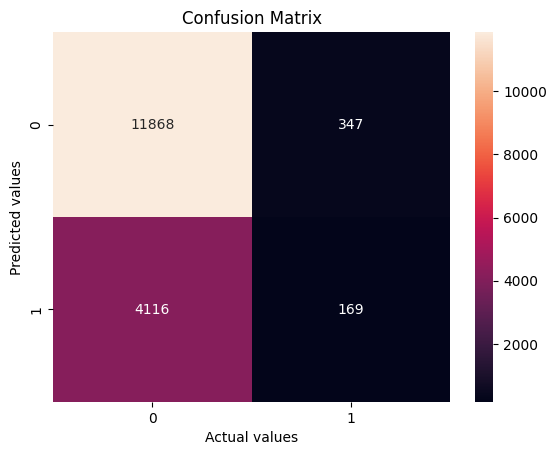

In [7]:
# confusion matrix as a heatmap using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

classes = np.unique(y_test)
xticklabels = classes.astype(int).astype(str).tolist()
yticklabels = classes.astype(int).astype(str).tolist()

ax= plt.subplot()

# annot=True to annotate cells, 
# ftm='g' to disable scientific notation
sns.heatmap(cm, 
            annot=True, fmt='g', ax=ax, 
            xticklabels=xticklabels, 
            yticklabels=yticklabels);  

# labels, title and ticks
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Confusion Matrix')

In [8]:
# ROC curve 
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.5055


In [10]:
from sklearn.metrics import roc_curve

y_prob_pred = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pred, pos_label = 1)

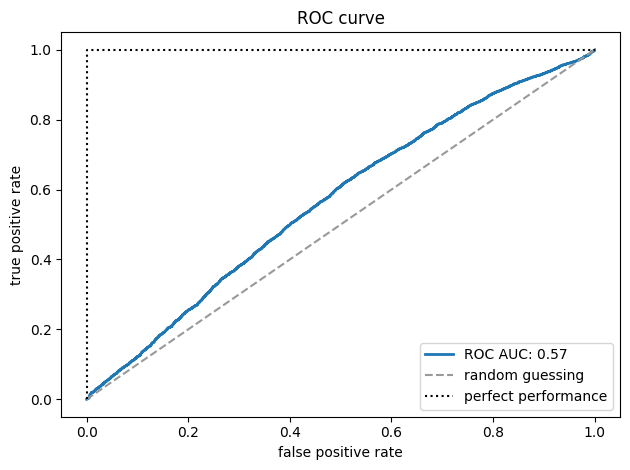

In [12]:
# AUC score that summarizes the ROC curve
# Reference: https://ethen8181.github.io/machine-learning/model_selection/auc/auc.html

from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()